<h1 id="tocheading">Проект: Исследование приложения стартапа продуктов питания</h1>
<div id="toc"></div>

## Цель проекта
Проанализировать данные использования приложения стартапа, который занимается продажей еды. Изучить воронку продаж в приложении и выяснить как пользователи проходят через разные этапы воронки. Исследовать результаты А/А/В-теста для того, чтобы выяснить изменилось ли поведение контрольной группы пользователей, которая видит измененный шрифт. На основе А/В-теста принять решение по поводу использования шрифта.  

### План работы:
[ 1. Импорт нужных библиотек и датасетов. Подготовить их к анализу.](#step1)

[ 2. Изучить и проверить данные ](#step2)


[ 3. Воронка событий ](#step3)


[ 4. Эксперимент и его результаты](#step4)


[ 5. Общий вывод](#step5)

## <a id="step1">1. Импорт нужных библиотек и датасетов, предварительно изучение данных.</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import math as mth
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 

In [2]:
# импорттируем данные журнала событий
data =  pd.read_csv('logs_exp.csv', sep = '\t')

In [10]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [11]:
# зададим более удобные названия столбцов
data.columns = ['event_name','user_id','event_timestamp','group']

In [12]:
# проверим типы данных и наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   user_id          244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   group            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.5+ MB


In [13]:
# приведем данные к типу datetiime, принимая во внимание, что они отображены в секундах
data['date_time'] = pd.to_datetime(data['event_timestamp'], unit='s')

In [14]:
# отобразим дату и время в столбце с временными данными
data['date_time'] = data['date_time'].astype('datetime64') 

In [15]:
# выделим отдельный столбец с датой
data['event_date'] = data['date_time'].dt.date

In [16]:
# проверим на наличие дупликатов
data.duplicated().sum()

413

In [17]:
# глянем на дубликаты в датафрейме
data[data.duplicated(keep=False)].head(8)

,event_name,user_id,event_timestamp,group,date_time,event_date
452,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44,2019-07-30
453,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44,2019-07-30
2348,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39,2019-07-31
2350,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39,2019-07-31
3572,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
3573,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
4075,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46,2019-08-01
4076,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46,2019-08-01


In [18]:
# удалим дупликаты
# 413 дублированных строк не окажут серьёзного влияния на 243 000 строк во всем датафрейме
data.drop_duplicates(inplace = True)

## <a id="step2">2. Изучим наши данные.</a>

In [20]:
# общее количество событий в журнале событий - 243 000
n_events = len(data) 
n_events

243713

In [21]:
# проверим количество уникальных пользователей 
n_unique_users = data.user_id.nunique()
n_unique_users

7551

Количество уникальных пользователей - 7551

In [22]:
avg_events_per_user = n_events / n_unique_users

In [23]:
# в среднем на одного юзера приходится 32 события
avg_events_per_user

32.27559263673685

В среднем на одного юзера приходится 32 события

In [24]:
# располагаю данными за период с 25 июля по 7 августа 2019 года 
data.date_time.describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: date_time, dtype: object

In [25]:
data.head(2)

,event_name,user_id,event_timestamp,group,date_time,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25


In [26]:
datetime_groupped = data.groupby('date_time').agg({'user_id':'count'}).reset_index()

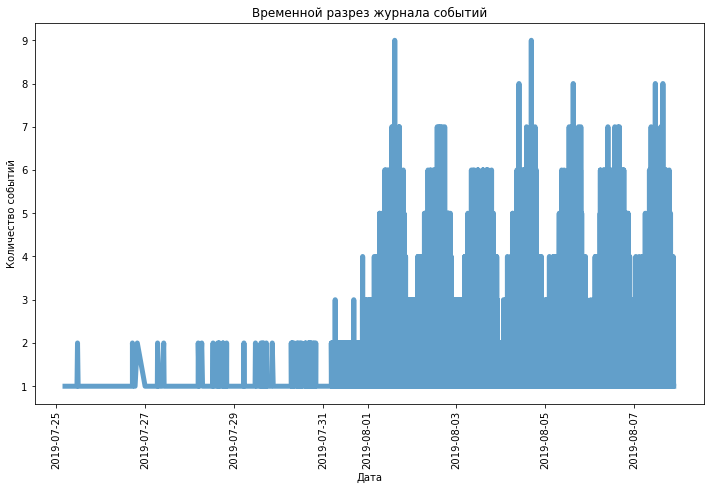

In [27]:
plt.figure(figsize=(12, 7))
x = datetime_groupped['date_time']
y = datetime_groupped['user_id']
plt.title("Временной разрез журнала событий")
plt.xlabel("Дата")
plt.ylabel("Количество событий")
plt.plot(x, y, alpha=0.7, label='first', lw=5, mec='b', mew=2, ms=10)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
data.head()

,event_name,user_id,event_timestamp,group,date_time,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Данные распределены за весь период неравномерно и сдвинуты ближе к августовским значениям. Логи становятся полными только начиная с 1 августа. Соответственно все события, которые происходили до 1 августа можно откинуть. После откидывания ненужных данных мы будем распологать данными с 1 августа по 8 августа.

In [29]:
# избавимся от строк, относящихся к событиям предшествовавшим 1 августа
data = data[data['date_time'] > '2019-08-01']

In [30]:
# потеряно минимальное количество строк - было 243 713, стало 242 917
len(data)

240887

In [31]:
# как можем заметить у нас есть юзеры, принадлежащие ко всем трем группам
# 246,247 - контрольные группы, 248 - экспериментальная группа
# во всех группах примерно одинаковое количество участников
# ниже разница в количестве будет исследована более детально
data.groupby('group')['user_id'].nunique().reset_index()

,group,user_id
0,246,2484
1,247,2513
2,248,2537


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font><font color='green'>
ясно)

## <a id="step3">3. Изучим воронку событий.</a>

In [32]:
data.head()

,event_name,user_id,event_timestamp,group,date_time,event_date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [33]:
# посмотрим на общее количество всех типов событий 
all_events = data.groupby('event_name').agg({'user_id':'count'}).reset_index().sort_values(by = 'user_id',ascending = False)

In [34]:
all_events.columns = ['event_name','n_events']

In [35]:
all_events

,event_name,n_events
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Наиболее частым событием является отбражение главной страницы сайта (117328). За ним следует страница с предложением(46333), страница с корзиной(42303) и страница успешной оплаты заказа(33918). Наименьшее количество отображений у страницы с обучением(1005) - пользователи не часто туда попадают.

In [36]:
# взглянем на количество уникальных пользователей, совершавших каждое действие
unique_n_events = data.groupby('event_name').agg({'user_id':'nunique'}).reset_index().sort_values(by = 'user_id',ascending = False)

По количеству пользователей, совершавших событие, картина такая же, как и по общему количеству событий в целом. Наибольшое количество пользователей зашли на главный экран, а меньше всего на обучение.

In [37]:
unique_n_events.columns = ['event_name','unique_users']

In [38]:
# количество уникальных пользователей в журнале событий
data.user_id.nunique()

7534

In [39]:
# выделим долю пользователей, которые хоть раз совершали событие 
unique_n_events['user_share'] = ((unique_n_events['unique_users'] / 7542) * 100)

In [40]:
unique_n_events

,event_name,unique_users,user_share
1,MainScreenAppear,7419,98.37
2,OffersScreenAppear,4593,60.90
0,CartScreenAppear,3734,49.51
3,PaymentScreenSuccessful,3539,46.92
4,Tutorial,840,11.14


Мы можем заметить последовательное уменьшение доли пользователей по ходу движения воронки событий. Лишней выглядит только обучающая страница.

События происходят в следующем порядке:
1. Пользователей заходит на главную страницу
2. Затем он переходит по ссылке на экран предложений доступных товаров
3. После выбора какого-либо товара, он/она перемещается на страницу "корзина", где видит все свои заказы
4. Там он оплачивает товар и переходит на экран, подтверждающий оплату товаров

Обучающую страницу не следует учитывать как составную часть воронки, т.к. она не вписывается в логику событий воронки.

In [41]:
events_count = unique_n_events.drop(index=4)

In [42]:
events_count

,event_name,unique_users,user_share
1,MainScreenAppear,7419,98.37
2,OffersScreenAppear,4593,60.90
0,CartScreenAppear,3734,49.51
3,PaymentScreenSuccessful,3539,46.92


In [43]:
# посмотрим на процентное изменение количества пользователей на каждом последующем этапе
events_count['unique_users'].pct_change()

1     nan
2   -0.38
0   -0.19
3   -0.05
Name: unique_users, dtype: float64

1. Как можем заметить, больше всего пользователей "отвалилось" после перехода с главного экрана на экран предложений продуктов - 38%. 
2. После перехода с экрана предложений на экран "корзины" стало меньше еще на 19%.
3. С корзины на экран подтверждения покупки не доходит 14%.

In [44]:
events_count.iloc[3,1] / events_count.iloc[0,1]

0.47701846610055265

Как видим с главной страницы до страницы, подтверждающей приобретение товара добралось 47% пользователей.

## <a id="step4">4. Изучим результаты эксперимента.</a>

In [45]:
# посмотрим на количество юзеров в группах
users_in_group = data.groupby('group').agg({'user_id':'nunique'}).reset_index()
users_in_group.columns = ['group','n_users_group']
users_in_group

,group,n_users_group
0,246,2484
1,247,2513
2,248,2537


In [46]:
# проверим все ли пользователи принадлежат только к одной группе
unique_users = data.groupby('user_id').agg({'group':'nunique'}).reset_index()
unique_users.query('group > 1').shape[0]

0

In [47]:
for group1 in users_in_group['group']:
    for group2 in users_in_group['group']:
        if (group1 == group2):
            continue
        else:
            diff = (users_in_group[users_in_group['group'] == group1]['n_users_group'].iloc[0] \
                         / users_in_group[users_in_group['group'] == group2]['n_users_group'].iloc[0]-1) * 100
            print(group1, group2, diff)

246 247 -1.1539992041384783
246 248 -2.089081592432007
247 246 1.1674718196457379
247 248 -0.9459992116673255
248 246 2.133655394524969
248 247 0.955033824114615


Как видим разница в количестве участников групп невелика, поэтому мы можем продолжать эксперимент.

####  Проведем а/а тест между контрольными группами перед тем как проводить а/в тест между контрольными и экспериментальной группами

In [48]:
data = data[data['event_name'] != "Tutorial"]

In [49]:
users_in_group

,group,n_users_group
0,246,2484
1,247,2513
2,248,2537


In [50]:
# для а-а теста уберем экспериментальную группу
a_test = data.groupby(['group','event_name']).agg({'user_id':'nunique'}).reset_index()#.query('group == 246 or group == 247')

In [51]:
a_test.columns = ['group','event_name','n_users']

In [52]:
# объединим таблицу с общим количеством юзеров в группе и количеством юзеров на каждом этапе 
aa_test = pd.merge(a_test, users_in_group,on = 'group')

In [53]:
aa_test 

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


Нам нужно сравнить есть ли статистические различия в пропорции пользователей каждой из контрольной групп на различных этапах (событиях) воронки

#### Тест на различие между контрольными группами на главном экране

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 247, успешно открывшими главный экран, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями пользователей групп на этом шаге воронки существуют статистически значимые различия.

In [54]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2483,2512])
successes = ([2450,2476])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 247
p2 = successes[1]/trials[1]

In [55]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [56]:
# разница пропорций между группами
difference = p1 - p2

In [57]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [58]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [59]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [60]:
p_value

0.7526703436483038

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 247, успешно открывшими главный экран, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей контрольных групп на экране предложений товаров

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 247, успешно открывшими экран предложений товаров, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями пользователей групп на этом шаге воронки существуют статистически значимые различия.

In [61]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2483,2512])
successes = ([1542,1520])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 247
p2 = successes[1]/trials[1]

In [62]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [63]:
# разница пропорций между группами
difference = p1 - p2

In [64]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [65]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [66]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [67]:
p_value

0.24786096925282264

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 247, успешно открывшими  экран предложения товаров, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей контрольных групп на экране Корзины

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 247, успешно открывшими экран Корзина, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями пользователей групп на этом шаге воронки существуют статистически значимые различия.

In [68]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2483,2512])
successes = ([1266,1238])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 247
p2 = successes[1]/trials[1]

In [69]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [70]:
# разница пропорций между группами
difference = p1 - p2

In [71]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [72]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [73]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [74]:
p_value

0.22867643757335676

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 247, успешно открывшими  экран Корзины, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей контрольных групп на экране подтверждения покупки

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 247, которые перешли на экран подтверждения покупки, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями пользователей групп на этом шаге воронки существуют статистически значимые различия.

In [75]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2483,2512])
successes = ([1200,1158])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 247
p2 = successes[1]/trials[1]

In [76]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [77]:
# разница пропорций между группами
difference = p1 - p2

In [78]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [79]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [80]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [81]:
p_value

0.11446627829276612

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 247, перешедшими на экран успешной оплаты, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

Таким образом мы можем сказать, что разбиение на группы работает корректно на всех этапах воронки и мы можем использовать группы 246 и 247 в качестве контрольных.

## Альтернативные и экспериментальные группы

#### Тест на различие между долями пользователей группы 246 (контр.группа) и 248(экспер.группа) на главном экране


Сравним по отдельности результаты экспериментальной группы 248 c контрольной группой 246 отдельно по каждому событию

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 248, которые перешли на главный экран, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [82]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [83]:
# зададим уровень значимости 
alpha = .05
# количество пользователей  и их пропорция успешных действий 
trials = ([2483,2535])
successes = ([2450,2493])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [84]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [85]:
# разница пропорций между группами
difference = p1 - p2

In [86]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [87]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [88]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [89]:
p_value

0.3387114076159288

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 248, перешедшими на главный экран, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 246 (контр.группа) и 248(экспер.группа) на экране предложений товаров


Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 248, которые перешли на экран предложения товаров, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [90]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [91]:
# зададим уровень значимости 
alpha = .05
# количество пользователей  и их пропорция успешных действий 
trials = ([2483,2535])
successes = ([1542,1520])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [92]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [93]:
# разница пропорций между группами
difference = p1 - p2

In [94]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [95]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [96]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [97]:
p_value

0.11986704572805484

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 248, перешедшими на  экран предложения товаров, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 246 (контр.группа) и 248(экспер.группа) на экране Корзины


Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 248, которые перешли на экран Корзины, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [98]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [99]:
# зададим уровень значимости 
alpha = .05
# количество пользователей  и их пропорция успешных действий 
trials = ([2483,2535])
successes = ([1266,1230])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [100]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [101]:
# разница пропорций между группами
difference = p1 - p2

In [102]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [103]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [104]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [105]:
p_value

0.08067367598823139

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 248, перешедшими на  экран Корзины, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 246 (контр.группа) и 248(экспер.группа) на экране Оплаты


Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 246 и 248, которые перешли на экран Оплаты, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [106]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [107]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2483,2535])
successes = ([1200,1181])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [108]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [109]:
# разница пропорций между группами
difference = p1 - p2

In [110]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [111]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [112]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [113]:
p_value

0.21693033984516674

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 246 и 248, перешедшими на  экран Оплаты, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 247 (контр.группа) и 248(экспер.группа) на главном экране 

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 247 и 248, которые перешли на главный экран , нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [114]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [115]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2512,2535])
successes = ([2476,2493])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [116]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [117]:
# разница пропорций между группами
difference = p1 - p2

In [118]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [119]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [120]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [121]:
p_value

0.5194964354051703

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 247 и 248, перешедшими на главный экран , нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 247 (контр.группа) и 248(экспер.группа) на экране предложения товаров


Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 247 и 248, которые перешли на экран предложения товаров, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [122]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [123]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их пропорция успешных действий 
trials = ([2512,2535])
successes = ([1520,1531])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [124]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [125]:
# разница пропорций между группами
difference = p1 - p2

In [126]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [127]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [128]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [129]:
p_value

0.9333751305879443

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 247 и 248, перешедшими на  экран предложения товаров, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольными группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 247 (контр.группа) и 248(экспер.группа) на экране Корзина

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 247 и 248, которые перешли на Корзина, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [130]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [131]:
# зададим уровень значимости 
alpha = .05
# количество пользователей и их доля на определенном шаге воронки 
trials = ([2512,2535])
successes = ([1238,1230])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [132]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [133]:
# разница пропорций между группами
difference = p1 - p2

In [134]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [135]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [136]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [137]:
p_value

0.5878284605111943

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 247 и 248, перешедшими на  экран Корзина, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами не обнаружено группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей группы 247 (контр.группа) и 248(экспер.группа) на экране оплаты

Нулевая гипотеза (Н0) гласит, что между долями пользователей групп 247 и 248, которые перешли на Корзина, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [138]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [139]:
# зададим уровень значимости 
alpha = .05
# общее количество пользователей группы и их доля на определенном шаге воронки 
trials = ([2512,2535])
successes = ([1158,1181])
# пропорция успехов в группе 246
p1 = successes[0]/trials[0]
# пропорция успехов в группе 248
p2 = successes[1]/trials[1]

In [140]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [141]:
# разница пропорций между группами
difference = p1 - p2

In [142]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [143]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [144]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [145]:
p_value

0.7275718682261119

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями пользователей групп 247 и 248, перешедшими на  экран Оплаты, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей объединенной контрольной группы и  экспериментальной группой на главном экране 

Нулевая гипотеза (Н0) гласит, что между долями пользователей объединенной контрольной группы и экспериментальной группой, которые перешли на главный экран, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [146]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [147]:
# зададим уровень значимости 
alpha = .05
# общее количество пользователей группы и их доля на определенном шаге воронки 
trials = ([2483+2512,2535])
successes = ([2450+2476,2493])
# пропорция успехов в контрольной группе
p1 = successes[0]/trials[0]
# пропорция успехов в экспериментальной группе
p2 = successes[1]/trials[1]

In [148]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [149]:
# разница пропорций между группами
difference = p1 - p2

In [150]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [151]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [152]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [153]:
p_value

0.3486684291093256

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями объединенной контрольной и экспериментальной групп, перешедшими на Главный экран, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей объединенной контрольной группы и  экспериментальной группой на  экране предложений 

Нулевая гипотеза (Н0) гласит, что между долями пользователей объединенной контрольной группы и экспериментальной группой, которые перешли на экран предложения товаров, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [154]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [155]:
# зададим уровень значимости 
alpha = .05
# общее количество пользователей группы и их доля на определенном шаге воронки 
trials = ([2483+2512,2535])
successes = ([1542+1520,1531])
# пропорция успехов в контрольной группе
p1 = successes[0]/trials[0]
# пропорция успехов в экспериментальной группе
p2 = successes[1]/trials[1]

In [156]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [157]:
# разница пропорций между группами
difference = p1 - p2

In [158]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [159]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [160]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [161]:
p_value

0.44582745409482394

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями объединенной контрлольной и экспериментальной групп, перешедшими на экран предложения товаров, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей объединенной контрольной группы и  экспериментальной группой на экране Корзина 

Нулевая гипотеза (Н0) гласит, что между долями пользователей объединенной контрольной группы и экспериментальной группой, которые перешли на экран Корзина, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [162]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [163]:
# зададим уровень значимости 
alpha = .05
# общее количество пользователей группы и их доля на определенном шаге воронки 
trials = ([2483+2512,2535])
successes = ([1266+1238,1230])
# пропорция успехов в контрольной группе
p1 = successes[0]/trials[0]
# пропорция успехов в экспериментальной группе
p2 = successes[1]/trials[1]

In [164]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [165]:
# разница пропорций между группами
difference = p1 - p2

In [166]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [167]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [168]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [169]:
p_value

0.18683558686831558

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями объединенной контрольной и экспериментальной групп, перешедшими на экран Корзины, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами на этом этапе воронки не обнаружено.

#### Тест на различие между долями пользователей объединенной контрольной группы и  экспериментальной экране Оплаты

Нулевая гипотеза (Н0) гласит, что между долями пользователей объединенной контрольной группы и экспериментальной группой, которые перешли на экран Оплаты, нет статистически значимой разницы. Альтернативная гипотеза (Н1) говорит о том, что между долями групп на этом шаге воронки существуют статистически значимые различия.

In [170]:
aa_test

,group,event_name,n_users,n_users_group
0,246,CartScreenAppear,1266,2484
1,246,MainScreenAppear,2450,2484
2,246,OffersScreenAppear,1542,2484
3,246,PaymentScreenSuccessful,1200,2484
4,247,CartScreenAppear,1238,2513
5,247,MainScreenAppear,2476,2513
6,247,OffersScreenAppear,1520,2513
7,247,PaymentScreenSuccessful,1158,2513
8,248,CartScreenAppear,1230,2537
9,248,MainScreenAppear,2493,2537


In [171]:
# зададим уровень значимости 
alpha = .05
# общее количество пользователей группы и их доля на определенном шаге воронки 
trials = ([2483+2512,2535])
successes = ([1200+1158,1181])
# пропорция успехов в контрольной группе
p1 = successes[0]/trials[0]
# пропорция успехов в экспериментальной группе
p2 = successes[1]/trials[1]

In [172]:
# совместная пропорция успехов в двух группах:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [173]:
# разница пропорций между группами
difference = p1 - p2

In [174]:
# статистика z_value отображает в единицах стандартного отклонения есть ли значимае различия между группами
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [175]:
# зададим стандартное нормальное распределение
distr = st.norm(0,1)

In [176]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [177]:
p_value

0.6107918742187335

Мы не смогли отвергнуть нулевую гипотезу, которая говорит, что между долями объединенной контрольной и экспериментальной групп, перешедшими на экран оплаты, нет статистически значимой разницы. Т.к p_value значительно превосходит уровень статистической значимости 0.05,  значимой разницы между контрольной и экспериментальной группами на этом этапе воронки не обнаружено.

Таким образом, мы можем заключить, что на всех этапах воронки доля пользователей объединенной контрольной группы и экспериментальной группы статистически не отличается. 

## <a id="step5">5. Выводы.</a>

1. Больше всего пользователей "отвалилось" при переходе с главного экрана приложения на экран предложения товаров - 38%. 
2. С главного экрана до экрана подтверждения оплаты добралось 47% пользователей.
3. После проведении эксперимента и применения статистического теста для анализа результатов, мы можем заключить, что применение альтернативного шрифта в приложении не привело к статистически значимым изменениям в поведении пользователей при его использовании. На всех этапах воронки доля пользователей контрольных группы по отдельности и объединенной контрольной группы не отличалась статистически значимо от доли пользователей экспериментальной группы.
4. В общей сложности было проведено 16 проверок статистических гипотез.